In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/')

In [ ]:
#Librerías para manipulación de datos
import pandas as pd
import numpy as np

In [ ]:
#Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Librerías para análisis de series de tiempo
import statsmodels.api as sm

In [ ]:
#Librerías variables categóricas
#from category_encoders.ordinal import OrdinalEncoder
#from category_encoders.one_hot import OneHotEncoder


In [ ]:

#Librerías para modelos de machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
#import shap


# Análisis exploratorio del dataset

In [ ]:
df=pd.read_csv('fraud.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [ ]:
df= df[df['DayOfWeekClaimed'] != '0']
# Obtener los valores únicos por cada columna en un diccionario
unique_values_per_column = {col: df[col].unique() for col in df.columns}

# Mostrar los valores únicos por columna
for column, unique_values in unique_values_per_column.items():
    print(f"Columna: {column}")
    print(f"Valores Únicos: {unique_values}")
    print("="*50)


Columna: Month
Valores Únicos: ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Columna: WeekOfMonth
Valores Únicos: [5 3 2 4 1]
Columna: DayOfWeek
Valores Únicos: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Columna: Make
Valores Únicos: ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Columna: AccidentArea
Valores Únicos: ['Urban' 'Rural']
Columna: DayOfWeekClaimed
Valores Únicos: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
Columna: MonthClaimed
Valores Únicos: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']
Columna: WeekOfMonthClaimed
Valores Únicos: [1 4 2 3 5]
Columna: Sex
Valores Únicos: ['Female' 'Male']
Columna: MaritalStatus
Valores Únicos: ['Single' 'Married' 'Widow' 'Divorced']
Columna: Age
Valores Únicos: [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  int64 
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  int64 
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  PolicyNumber          15419 non-null  int

In [ ]:
df['BasePolicy'].value_counts()


,count
BasePolicy,
Collision,5962
Liability,5009
All Perils,4448


In [ ]:
df["FraudFound"].value_counts(normalize=False)

,count
FraudFound,
No,14496
Yes,923


In [ ]:
df["FraudFound"].value_counts(normalize=True)

,proportion
FraudFound,
No,0.940139
Yes,0.059861


In [ ]:
df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15419.000000,15419.000000,15419.000000,15419.00000,15419.000000,15419.000000,15419.000000,15419.000000
mean,2.788637,2.694079,39.858292,7710.90168,8.482846,407.704780,2.487840,1994.866528
std,1.287611,1.259082,13.488996,4451.37980,4.599798,43.952379,1.119482,0.803309
min,1.000000,1.000000,0.000000,1.00000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3856.50000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7711.00000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.50000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.00000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [ ]:
#df=df.drop(columns=['Month', 'WeekOfMonth','DayOfWeek','DayOfWeekClaimed','WeekOfMonthClaimed','Age','RepNumber','DriverRating','AgeOfPolicyHolder', 'Year'])#Make, 'MaritalStatus' PolicyType AgeOfVehicle

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [ ]:
df.shape

(15419, 33)

In [ ]:
df["FraudFound"].value_counts(normalize=True)

,proportion
FraudFound,
No,0.940139
Yes,0.059861


In [ ]:
df[['MonthClaimed','FraudFound']].value_counts().reset_index().sort_values(by=['MonthClaimed', 'FraudFound'], ascending=True)


,MonthClaimed,FraudFound,count
7,Apr,No,1189
16,Apr,Yes,82
11,Aug,No,1034
15,Aug,Yes,92
10,Dec,No,1097
22,Dec,Yes,49
6,Feb,No,1209
17,Feb,Yes,78
0,Jan,No,1354
14,Jan,Yes,92


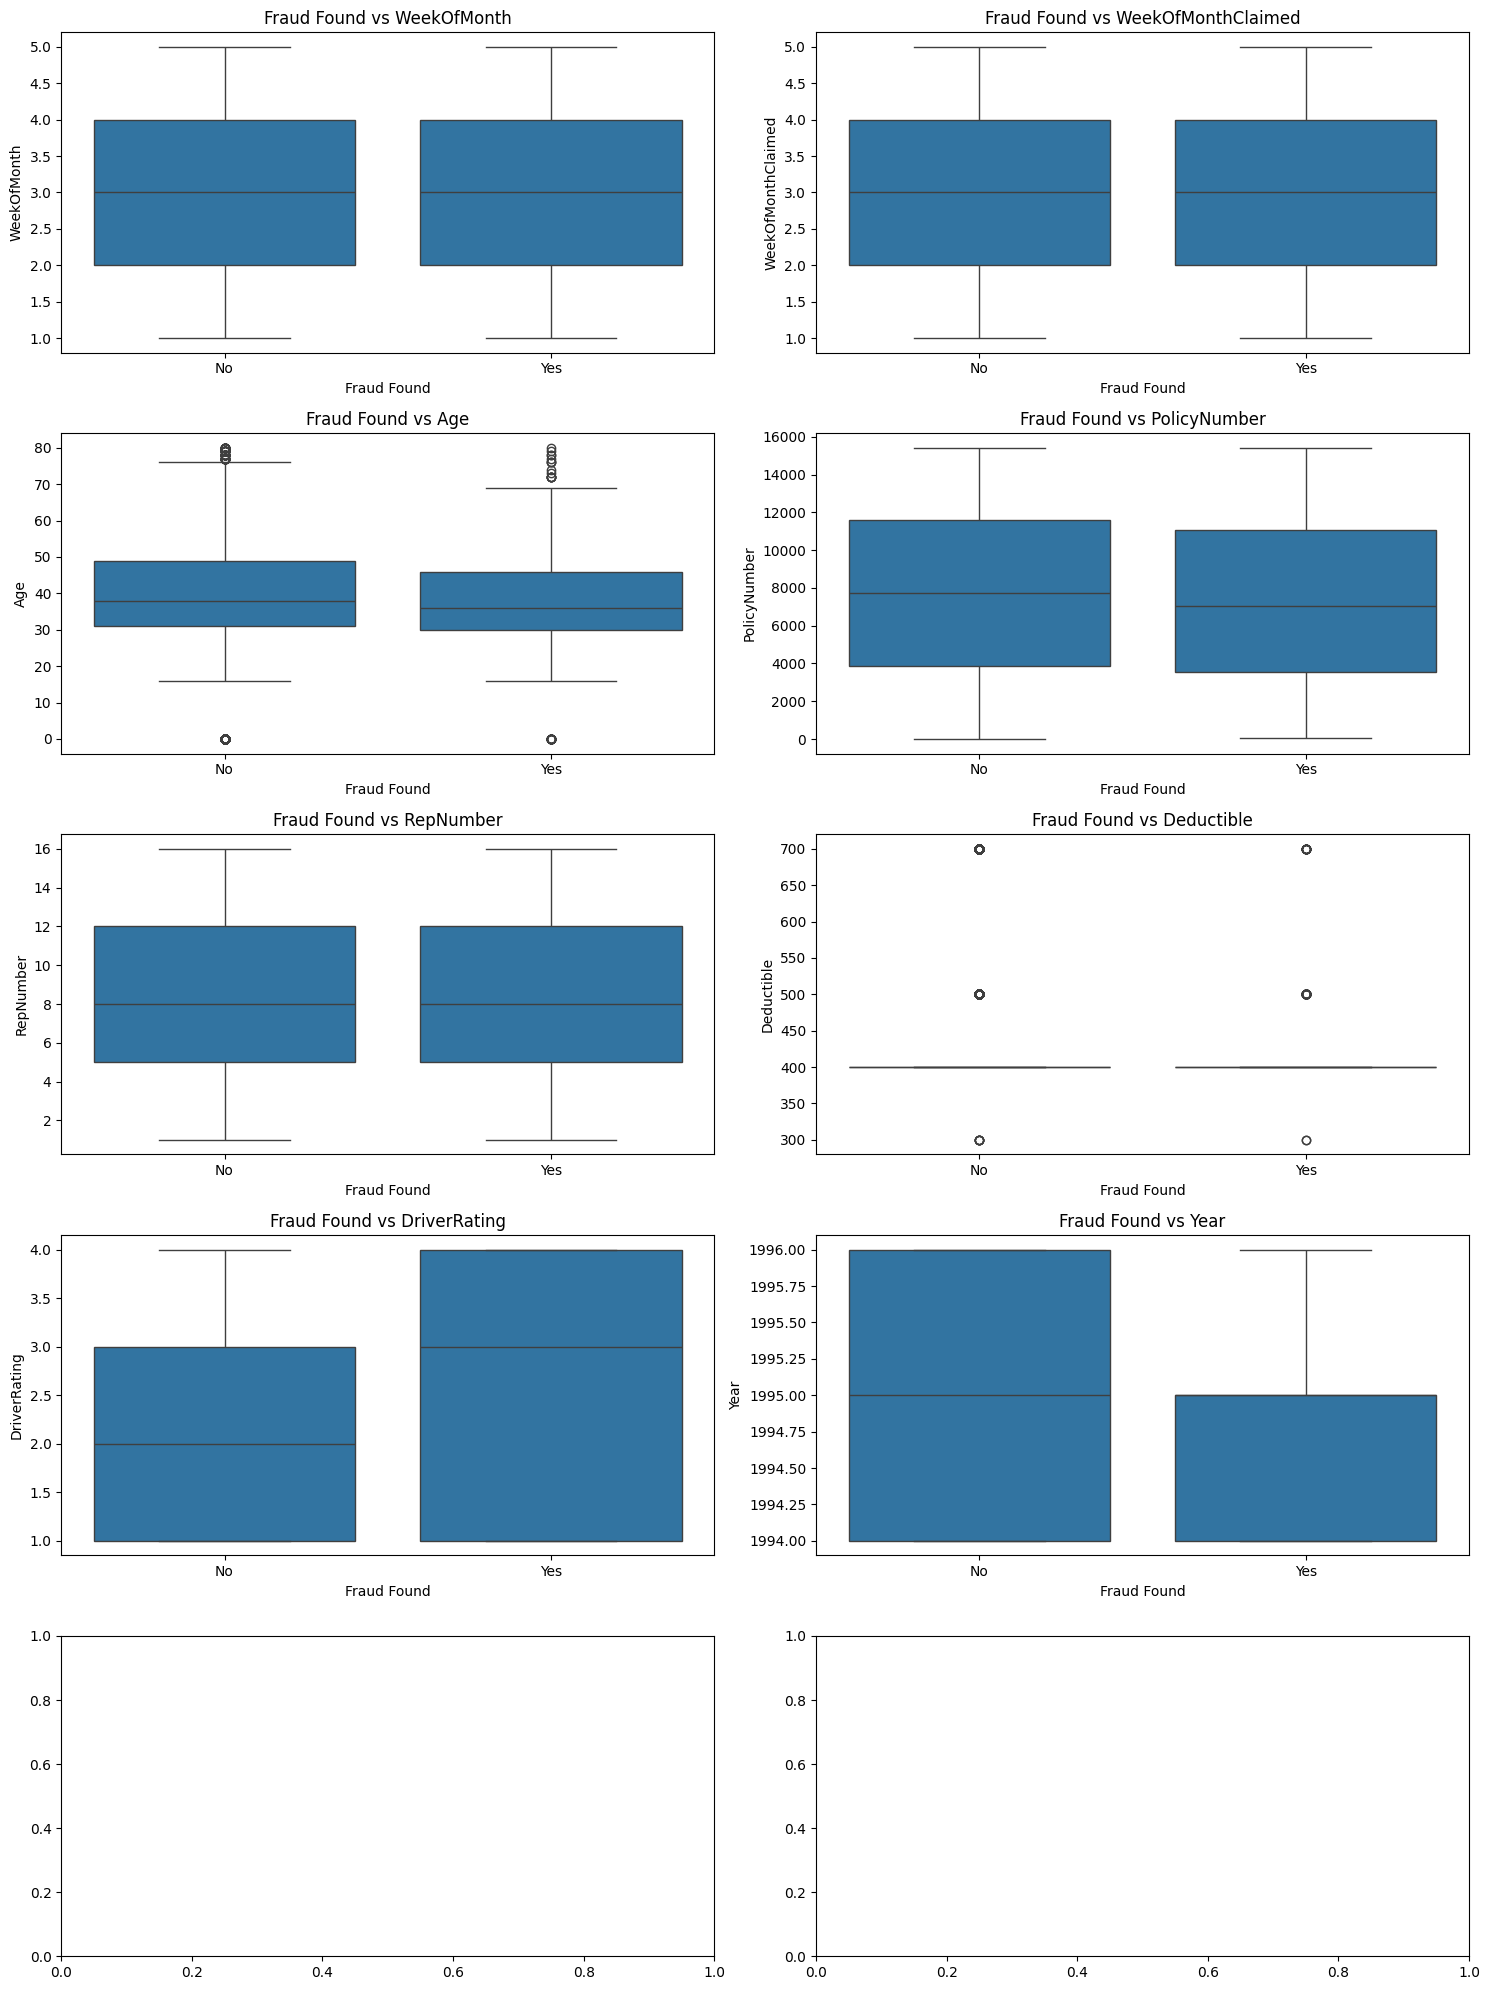

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Crear boxplots para cada columna numérica en relación con FraudFound
fig, axs = plt.subplots(len(numeric_columns)//2 + 1, 2, figsize=(15, 20))

# Flatten the axes array para facilitar la iteración
axs = axs.flatten()

# Para cada columna numérica, generar un gráfico de caja (boxplot)
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='FraudFound', y=col, data=df, ax=axs[i])
    axs[i].set_title(f'Fraud Found vs {col}')
    axs[i].set_xlabel('Fraud Found')
    axs[i].set_ylabel(col)

# Ajustar los espacios para que los gráficos no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()


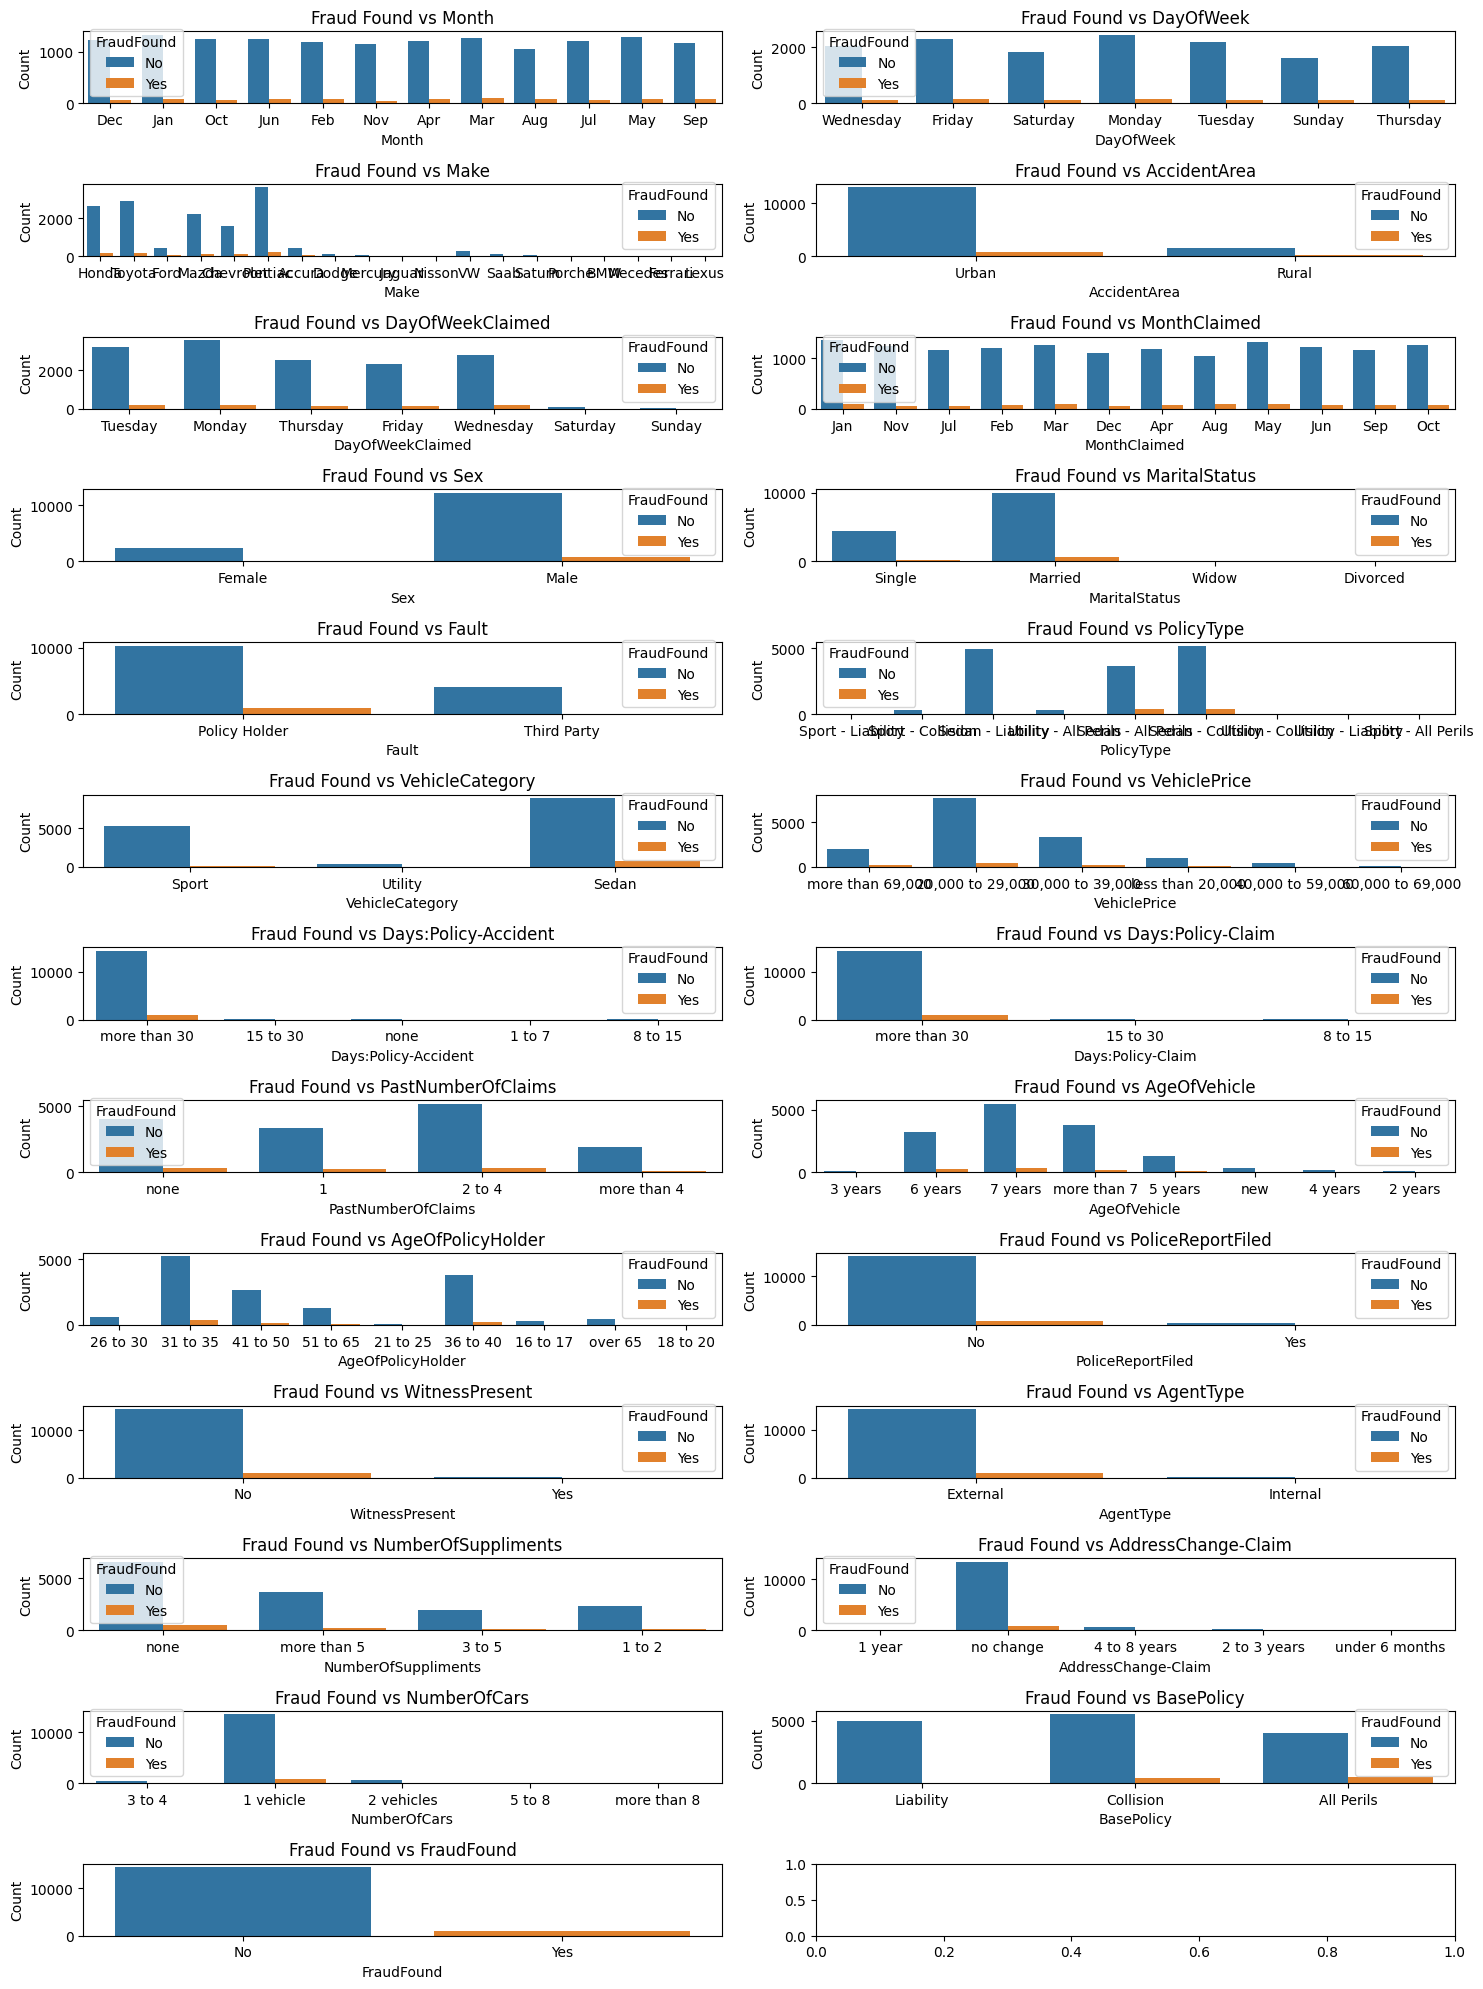

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear gráficos de barras para cada columna categórica en relación con FraudFound
fig, axs = plt.subplots(len(categorical_columns)//2 + 1, 2, figsize=(15, 20))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Para cada columna categórica, generar un gráfico de barras
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='FraudFound', data=df, ax=axs[i])
    axs[i].set_title(f'Fraud Found vs {col}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col)

# Ajustar los espacios para que los gráficos no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()


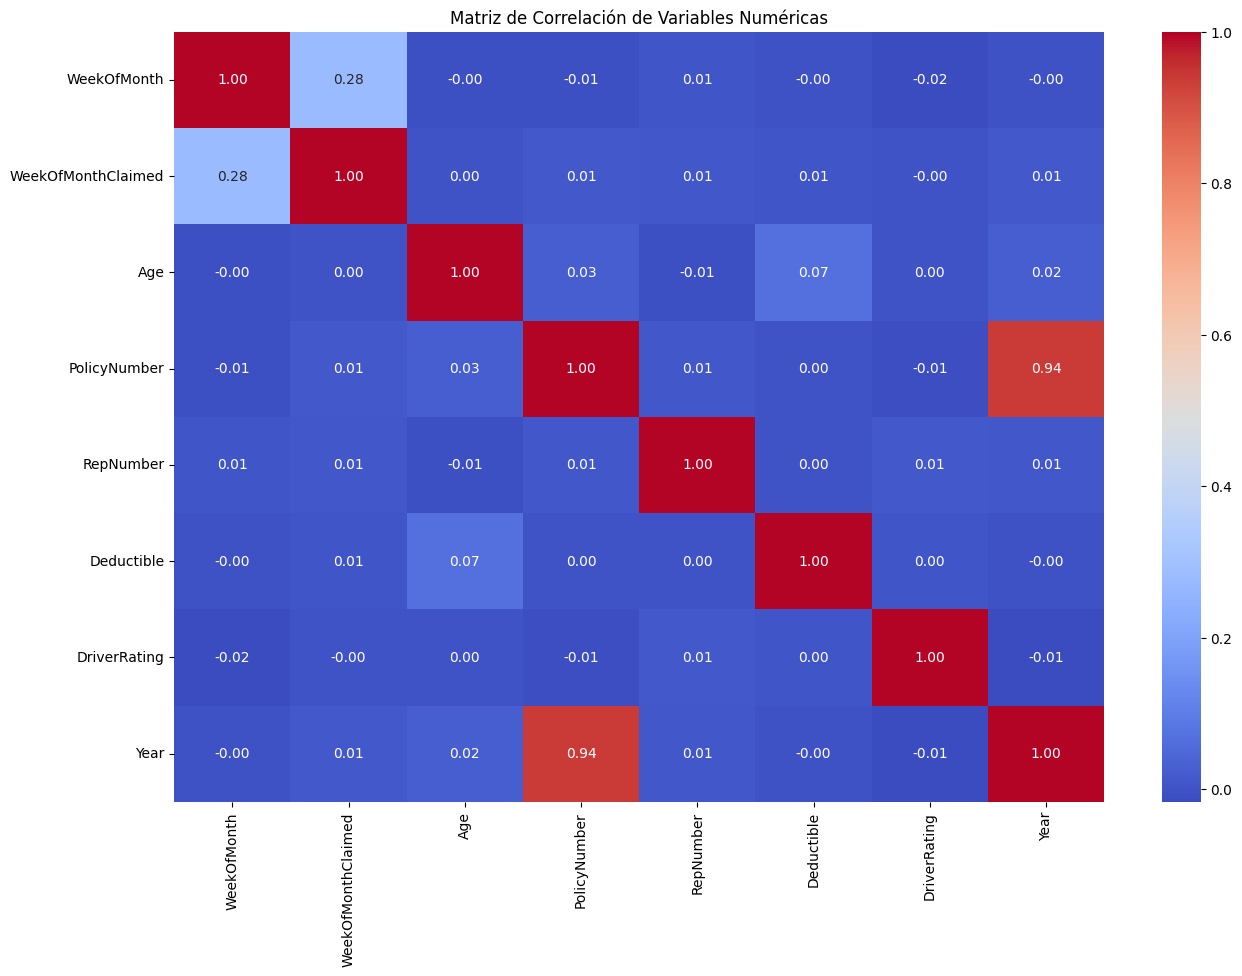

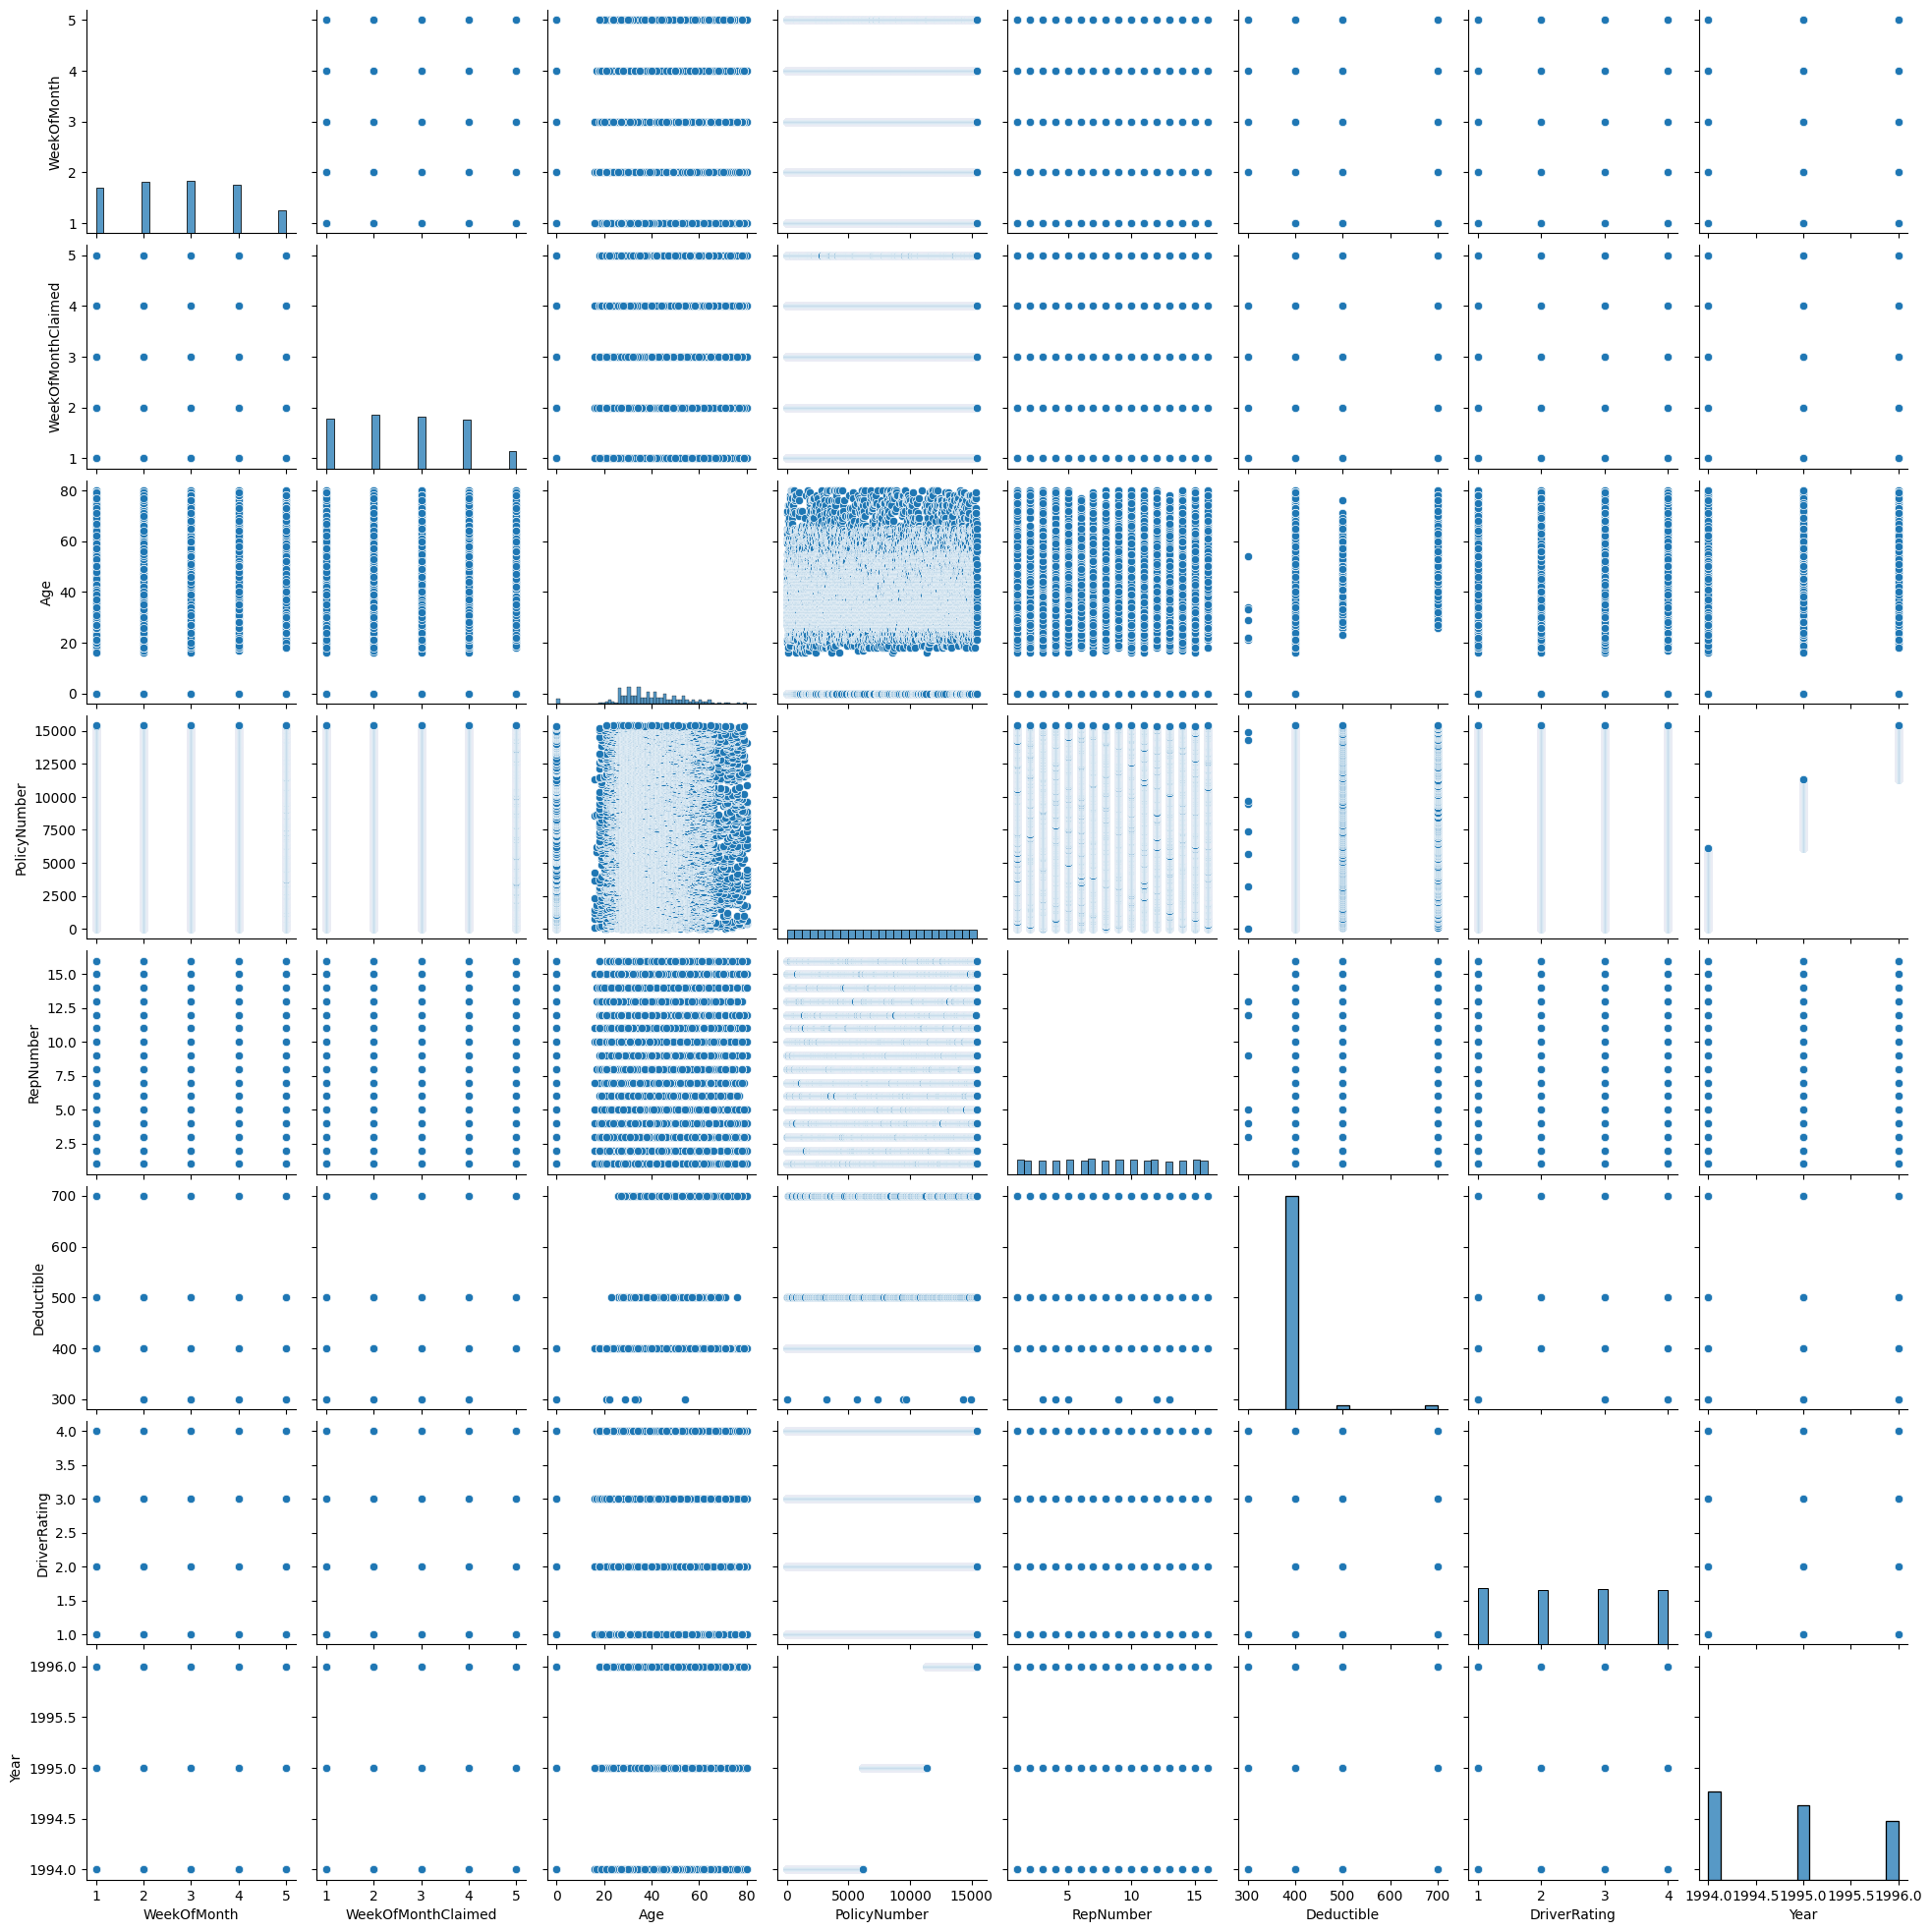

In [ ]:
# Correlación de variables numéricas
# The original code passed the whole dataframe 'data' to the include parameter.
# This is incorrect and the reason for the error.
# Changing 'include=data' to 'include=np.number' to select only numerical columns for correlation.
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Gráfico de pares para variables numéricas
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

In [ ]:
# Crear una nueva columna basada en la columna 'MaritalStatus'
df['MaritalStatusBinary'] = df['MaritalStatus'].apply(lambda x: 'Married' if x == 'Married' else 'UnMarried')

# Verificar los resultados
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,MaritalStatusBinary
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,No,External,none,1 year,3 to 4,1994,Liability,No,UnMarried
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,UnMarried
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,Married
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,Married
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,UnMarried


In [ ]:
# Crear un diccionario para mapear los meses a sus respectivos trimestres
month_to_quarter = {
    'Jan': 'T1', 'Feb': 'T1', 'Mar': 'T1',
    'Apr': 'T2', 'May': 'T2', 'Jun': 'T2',
    'Jul': 'T3', 'Aug': 'T3', 'Sep': 'T3',
    'Oct': 'T4', 'Nov': 'T4', 'Dec': 'T4'
}

# Crear una nueva columna 'MonthQuarter' para clasificar los meses en trimestres
df['Month_New'] = df['Month'].map(month_to_quarter)

# Crear una nueva columna 'MonthClaimedQuarter' para clasificar los meses reclamados en trimestres
df['MonthClaimedNew'] = df['MonthClaimed'].map(month_to_quarter)

df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,MaritalStatusBinary,Month_New,MonthClaimedNew
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,External,none,1 year,3 to 4,1994,Liability,No,UnMarried,T4,T1
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,External,none,no change,1 vehicle,1994,Collision,No,UnMarried,T1,T1
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,External,none,no change,1 vehicle,1994,Collision,No,Married,T4,T4
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,No,Married,T2,T3
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,External,none,no change,1 vehicle,1994,Collision,No,UnMarried,T1,T1


In [ ]:
# Crear un diccionario para mapear los meses a sus respectivos trimestres
month_to_quarter = {
    'less than 20,000': 'less than 29,000', '20,000 to 29,000': 'less than 29,000',
    '40,000 to 59,000': 'T2', '30,000 to 39,000': 'T2',
    'Jul': 'T3', 'Aug': 'T3', 'Sep': 'T3',
    'Oct': 'T4', 'Nov': 'T4', 'Dec': 'T4'
}

# Crear una nueva columna 'MonthQuarter' para clasificar los meses en trimestres
df['Month_New'] = df['Month'].map(month_to_quarter)

# Crear una nueva columna 'MonthClaimedQuarter' para clasificar los meses reclamados en trimestres
df['MonthClaimedNew'] = df['MonthClaimed'].map(month_to_quarter)

df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,MaritalStatusBinary,Month_New,MonthClaimedNew
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,External,none,1 year,3 to 4,1994,Liability,No,UnMarried,T4,NaN
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,External,none,no change,1 vehicle,1994,Collision,No,UnMarried,NaN,NaN
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,External,none,no change,1 vehicle,1994,Collision,No,Married,T4,T4
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,No,Married,NaN,T3
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,External,none,no change,1 vehicle,1994,Collision,No,UnMarried,NaN,NaN


In [ ]:
df=pd.read_csv('fraud.csv', index_col='PolicyNumber')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
PolicyNumber,,,,,,,,,,,,,,,,,,,,,
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [ ]:
df= df[df['DayOfWeekClaimed'] != '0']
# Obtener los valores únicos por cada columna en un diccionario
unique_values_per_column = {col: df[col].unique() for col in df.columns}

# Mostrar los valores únicos por columna
for column, unique_values in unique_values_per_column.items():
    print(f"Columna: {column}")
    print(f"Valores Únicos: {unique_values}")
    print("="*50)


Columna: Month
Valores Únicos: ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Columna: WeekOfMonth
Valores Únicos: [5 3 2 4 1]
Columna: DayOfWeek
Valores Únicos: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Columna: Make
Valores Únicos: ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Columna: AccidentArea
Valores Únicos: ['Urban' 'Rural']
Columna: DayOfWeekClaimed
Valores Únicos: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
Columna: MonthClaimed
Valores Únicos: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']
Columna: WeekOfMonthClaimed
Valores Únicos: [1 4 2 3 5]
Columna: Sex
Valores Únicos: ['Female' 'Male']
Columna: MaritalStatus
Valores Únicos: ['Single' 'Married' 'Widow' 'Divorced']
Columna: Age
Valores Únicos: [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 4

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'FraudFound'],
      dtype='object')

In [ ]:
#df=df.drop(columns=['Month', 'WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Age','RepNumber','DriverRating','AgeOfPolicyHolder', 'Year'])#Make, 'MaritalStatus' PolicyType AgeOfVehicle

In [ ]:
df.groupby(['FraudFound','FraudFound']).count().head(30)

,,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy
FraudFound,FraudFound,,,,,,,,,,,,,,,,,,,,,
No,No,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,...,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496
Yes,Yes,923,923,923,923,923,923,923,923,923,923,...,923,923,923,923,923,923,923,923,923,923


In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
PolicyNumber,,,,,,,,,,,,,,,,,,,,,
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


#  Resampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Visualizar la distribución original de la clase 'FraudFound'
print("Distribución original:", Counter(df["FraudFound"]))

# Separar las características (X) y la columna objetivo (y)
X = df.drop(columns=["FraudFound"])
y = df["FraudFound"]

# Paso 1: Reducir la cantidad de ceros (clase mayoritaria) con Random UnderSampling
undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Mantener 50% de ceros respecto a los unos
X_under, y_under = undersampler.fit_resample(X, y)

# Paso 2: Aumentar la cantidad de unos (clase minoritaria) con Random OverSampling
oversampler = RandomOverSampler(sampling_strategy=0.4, random_state=42)  # Igualar la cantidad de unos a la de ceros
X_resampled, y_resampled = oversampler.fit_resample(X_under, y_under)

# Visualizar la nueva distribución de la clase 'FraudFound'
print("Distribución después de balancear:", Counter(y_resampled))

Distribución original: Counter({'No': 14496, 'Yes': 923})
Distribución después de balancear: Counter({'No': 9230, 'Yes': 3692})


In [ ]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Jul,2,Sunday,Pontiac,Urban,Thursday,Aug,1,Female,Married,...,36 to 40,No,No,External,none,no change,1 vehicle,1996,Liability,No
1,Jul,3,Tuesday,Chevrolet,Urban,Thursday,Jul,4,Male,Married,...,41 to 50,No,No,External,more than 5,no change,1 vehicle,1994,All Perils,No
2,Jul,2,Thursday,Honda,Urban,Thursday,Jul,4,Male,Married,...,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1996,Collision,No
3,Nov,2,Tuesday,Honda,Urban,Thursday,Nov,2,Male,Married,...,31 to 35,No,No,Internal,none,no change,1 vehicle,1996,Collision,No
4,Jan,3,Monday,Ford,Urban,Tuesday,Jan,3,Male,Married,...,over 65,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils,No


In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
PolicyNumber,,,,,,,,,,,,,,,,,,,,,
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# **Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento (70%) y una parte temporal (30%)
train_data, tmp_data = train_test_split(df_resampled, test_size=0.3, stratify=df_resampled["FraudFound"], random_state=42)

# Dividir la parte temporal en validación (50%) y prueba (50%), asegurando estratificación
val_data, test_data = train_test_split(tmp_data, stratify=tmp_data["FraudFound"], test_size=0.50, random_state=42)

In [ ]:
test_data.shape

(1939, 32)

In [ ]:
test_data["FraudFound"].value_counts(normalize=False)

,count
FraudFound,
No,1385
Yes,554


In [ ]:
val_data["FraudFound"].value_counts(normalize=False)

,count
FraudFound,
No,1384
Yes,554


In [ ]:
test_data["FraudFound"].value_counts(normalize=True)

,proportion
FraudFound,
No,0.714286
Yes,0.285714


In [ ]:
val_data["FraudFound"].value_counts(normalize=True)

,proportion
FraudFound,
No,0.714138
Yes,0.285862


# **Feature Engineering**

Estos códigos nos permiten crear nuevas características a partir de las columnas existentes, mejorando la capacidad del modelo para capturar relaciones entre las variables.



In [ ]:
df['Deductible'].value_counts(normalize=True).round(4)

,proportion
Deductible,
400,0.9623
700,0.0202
500,0.0171
300,0.0005


In [ ]:
df['Deducible_mayor400'] = np.where(df['Deductible'] > 400, 'Si', 'No')
df['Deducible_mayor400'].value_counts(normalize=True).round(4)

,proportion
Deducible_mayor400,
No,0.9628
Si,0.0372


In [ ]:
# Define las listas de estados civiles para 'Sin Pareja'
sin_pareja = ['Single', 'Divorced', 'Widow']
# Crea una nueva columna basada en la lista anterior
df['EstadoPareja'] = df['MaritalStatus'].apply(lambda x: 'Sin Pareja' if x in sin_pareja else 'Con Pareja')
df['EstadoPareja'].value_counts(normalize=True).round(4)

,proportion
EstadoPareja,
Con Pareja,0.6891
Sin Pareja,0.3109


**Duración entre accidente y reclamo**

In [ ]:
# Crear un diccionario para convertir los meses a números
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Convertir las columnas de meses a números
df['AccidentMonthNum'] = df['Month'].map(month_to_num)
df['ClaimMonthNum'] = df['MonthClaimed'].map(month_to_num)

# Crear una nueva columna que calcule la duración entre accidente y reclamo
df['AccidentToClaimDuration'] = df['ClaimMonthNum'] - df['AccidentMonthNum']

# Manejar los casos donde el reclamo fue hecho el año siguiente (duración negativa)
df['AccidentToClaimDuration'] = df['AccidentToClaimDuration'].apply(lambda x: x + 12 if x < 0 else x)

print(df[['Month', 'MonthClaimed', 'AccidentToClaimDuration']].head())


             Month MonthClaimed  AccidentToClaimDuration
PolicyNumber                                            
1              Dec          Jan                        1
2              Jan          Jan                        0
3              Oct          Nov                        1
4              Jun          Jul                        1
5              Jan          Feb                        1


**Riesgo basado en la edad**

In [ ]:
# Definir los niveles de riesgo en base a los grupos de edad
def assign_risk_level(age):
    if age >= 50:
        return 'Bajo'
    elif 30 <= age < 50:
        return 'Medio'
    else:
        return 'Alto'

# Crear una nueva columna 'RiskLevel' en el dataset
df['RiskLevel'] = df['Age'].apply(assign_risk_level)

print(df[['Age', 'RiskLevel']].head())


              Age RiskLevel
PolicyNumber               
1              21      Alto
2              34     Medio
3              47     Medio
4              65      Bajo
5              27      Alto


**Combinación de variables categóricas**

In [ ]:
# Crear una nueva columna que combine 'Make' y 'VehicleCategory'
df['Make_VehicleCategory'] = df['Make'] + "_" + df['VehicleCategory']

print(df[['Make', 'VehicleCategory', 'Make_VehicleCategory']].head())

#Combinación de variables categóricas


                Make VehicleCategory Make_VehicleCategory
PolicyNumber                                             
1              Honda           Sport          Honda_Sport
2              Honda           Sport          Honda_Sport
3              Honda           Sport          Honda_Sport
4             Toyota           Sport         Toyota_Sport
5              Honda           Sport          Honda_Sport


In [ ]:
def apply_mappings_meses(df):
    # Definir todos los mapeos
    month_mapping = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
    df['Month'] = df['Month'].map(month_mapping)
    df['MonthClaimed'] = df['MonthClaimed'].map(month_mapping)
    return df

def feature_engineering(df):
    # Crear una nueva columna basada en la columna 'MaritalStatus'
    #df['MaritalStatusBinary'] = df['MaritalStatus'].apply(lambda x: 'Married' if x == 'Married' else 'UnMarried')
    #df['MonthDifference'] = df.apply(lambda row: row['MonthClaimed'] - row['Month'] if row['MonthClaimed'] >= row['Month'] else row['MonthClaimed'] +12 - row['Month'], axis=1)
    df['Make_by_price'] = df['VehiclePrice'].apply(lambda x:'High' if x=='more than 69,000' else 'Medium' if x in ['40,000 to 59,000','60,000 to 69,000'] else 'Low')
    #df['Make_by_marca']=df['VehiclePrice'].apply(lambda x:'Generales' if x in ['Honda','Toyota','Ford', 'Mazda', 'Chevrolet', 'Pontiac', 'Accura', 'Dodge', 'Mercury', 'Nissan', 'VW', 'Saturn', 'Saab'] else 'Lujo y deportivas')
    return df

def map_object_columns(df):
    # Instanciar LabelEncoder
    label_encoders = {}

    # Iterar por todas las columnas del DataFrame que son tipo 'object'
    for col in df.select_dtypes(include=['object']).columns:
        # Inicializar el LabelEncoder para cada columna
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

        # Almacenar el encoder si se necesita revertir el proceso o inspeccionar las categorías
        label_encoders[col] = le

    return df, label_encoders

In [ ]:
#train_data=apply_mappings_meses(train_data)
train_data=feature_engineering(train_data)
df_encoded, encoders = map_object_columns(train_data)
train_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Make_by_price
9715,10,4,1,7,1,5,10,4,0,1,...,0,0,0,2,3,0,1995,1,1,1
4692,7,1,0,15,1,1,7,2,1,2,...,0,0,0,0,1,0,1994,1,0,1
8066,3,2,3,15,1,5,9,5,0,1,...,0,0,0,3,3,0,1995,0,0,1
5297,8,3,6,7,1,4,8,3,0,2,...,0,0,0,2,3,0,1994,2,0,1
2900,11,2,3,11,1,1,11,4,1,2,...,0,0,0,0,3,0,1994,2,0,1


In [ ]:
#val_data=apply_mappings_meses(val_data)
val_data=feature_engineering(val_data)
df_encoded_val_data, encoders_val_data = map_object_columns(val_data)
val_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Make_by_price
3191,1,1,5,2,1,5,1,2,1,1,...,0,0,0,1,3,0,1994,1,0,0
4114,7,3,2,13,1,5,7,4,1,1,...,0,0,0,3,3,0,1996,2,0,1
9103,11,2,1,7,1,1,11,2,1,1,...,0,0,0,2,3,0,1996,2,0,0
5341,0,2,6,10,1,0,0,4,1,1,...,0,0,0,2,2,1,1996,0,0,1
4097,11,4,6,7,1,4,11,5,0,1,...,0,0,0,0,3,2,1994,0,0,1


In [ ]:
#test_data=apply_mappings_meses(test_data)
test_data=feature_engineering(test_data)
df_encoded_test_data, encoders_test_data = map_object_columns(test_data)
test_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Make_by_price
7881,9,4,6,14,1,6,9,5,1,2,...,0,0,0,2,3,0,1995,2,0,1
11453,4,2,2,6,1,6,4,3,1,1,...,0,0,0,1,3,2,1995,1,1,1
4768,9,4,2,2,1,1,9,4,1,2,...,0,0,0,1,3,0,1994,0,0,0
2737,10,3,3,7,0,5,10,3,1,1,...,0,0,0,3,3,0,1996,1,0,1
6766,0,3,6,6,1,1,0,4,1,1,...,0,0,0,3,3,0,1994,0,0,1


In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Year,BasePolicy,FraudFound,Deducible_mayor400,EstadoPareja,AccidentMonthNum,ClaimMonthNum,AccidentToClaimDuration,RiskLevel,Make_VehicleCategory
PolicyNumber,,,,,,,,,,,,,,,,,,,,,
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,1994,Liability,No,No,Sin Pareja,12,1,1,Alto,Honda_Sport
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,1994,Collision,No,No,Sin Pareja,1,1,0,Medio,Honda_Sport
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,1994,Collision,No,No,Con Pareja,10,11,1,Medio,Honda_Sport
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,1994,Liability,No,No,Con Pareja,6,7,1,Bajo,Toyota_Sport
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,1994,Collision,No,No,Sin Pareja,1,2,1,Alto,Honda_Sport


**Ratio de reclamos por año de la póliza**

In [ ]:
# Primero, convertir las columnas 'PastNumberOfClaims' y 'AgeOfPolicyHolder' a numéricas si no lo están
df['PastNumberOfClaims'] = pd.to_numeric(df['PastNumberOfClaims'], errors='coerce')

# Asegurarse de que 'AgeOfPolicyHolder' sea tratado como cadena antes de extraer los dígitos
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].astype(str).str.extract('(\d+)')[0]
df['AgeOfPolicyHolder'] = pd.to_numeric(df['AgeOfPolicyHolder'], errors='coerce')

# Crear una nueva columna que calcule el ratio de reclamos por año
df['ClaimsPerYear'] = df['PastNumberOfClaims'] / df['AgeOfPolicyHolder']

# Mostrar los resultados
print(df[['PastNumberOfClaims', 'AgeOfPolicyHolder', 'ClaimsPerYear']].head())



              PastNumberOfClaims  AgeOfPolicyHolder  ClaimsPerYear
PolicyNumber                                                      
1                            NaN                 26            NaN
2                            NaN                 31            NaN
3                            1.0                 41       0.024390
4                            1.0                 51       0.019608
5                            NaN                 31            NaN


# **Encoding**

In [ ]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'AgeOfVehicle',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy',
 'FraudFound',
 'Deducible_mayor400',
 'EstadoPareja',
 'RiskLevel',
 'Make_VehicleCategory']

In [ ]:
# Crear un diccionario para almacenar las categorías
categories = {}

# Iterar sobre las columnas categóricas y obtener sus valores únicos
for col in categorical_cols:
    categories[col] = df[col].unique()

# Mostrar las categorías
for col, vals in categories.items():
    print(f"Columna: {col}\nValores Únicos: {vals}\n{'='*50}")


Columna: Month
Valores Únicos: ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Columna: DayOfWeek
Valores Únicos: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Columna: Make
Valores Únicos: ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Columna: AccidentArea
Valores Únicos: ['Urban' 'Rural']
Columna: DayOfWeekClaimed
Valores Únicos: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
Columna: MonthClaimed
Valores Únicos: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']
Columna: Sex
Valores Únicos: ['Female' 'Male']
Columna: MaritalStatus
Valores Únicos: ['Single' 'Married' 'Widow' 'Divorced']
Columna: Fault
Valores Únicos: ['Policy Holder' 'Third Party']
Columna: PolicyType
Valores Únicos: ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Peril

In [ ]:
categorical_columns = df.select_dtypes(exclude=["number"]).columns

In [ ]:
categorical_columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident',
       'Days:Policy-Claim', 'AgeOfVehicle', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'BasePolicy', 'FraudFound',
       'Deducible_mayor400', 'EstadoPareja', 'RiskLevel',
       'Make_VehicleCategory'],
      dtype='object')

In [ ]:
ordinal_cols = ['PoliceReportFiled', 'WitnessPresent']
onehot_cols = ['MaritalStatus', 'VehicleCategory', 'PolicyType']
target_cols = ['RiskLevel', 'Make_VehicleCategory', 'FraudFound']

In [ ]:
df['PoliceReportFiled'].value_counts()

,count
PoliceReportFiled,
No,14991
Yes,428


In [ ]:
df["RiskLevel"].value_counts()

,count
RiskLevel,
Medio,8609
Bajo,3568
Alto,3242


In [ ]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

In [ ]:
  ordinal_encoder = OrdinalEncoder(
    cols=ordinal_cols,
    mapping=[
        {
            "col": "PoliceReportFiled",
            "mapping": {"No": 0, "Yes": 1}
        },
        {
            "col": "WitnessPresent",
            "mapping": {"No": 0, "Yes": 1}
        },
    ]
)
onehot_encoder = OneHotEncoder(cols=onehot_cols, use_cat_names=True)
target_encoder = TargetEncoder(cols=target_cols)

In [ ]:
!pip install category_encoders
import category_encoders as ce

In [ ]:
ordinal_encoder = ordinal_encoder.fit(train_data) # Fit encoder
#onehot_encoder = onehot_encoder.fit(train_data)
#target_encoder = target_encoder.fit(train_data, train_data['FraudFound'])

In [ ]:
ordinal_encoder = ordinal_encoder.fit(X=train_data)
#onehot_encoder = onehot_encoder.fit(X=train_data)
#target_encoder = target_encoder.fit(X=train_data, y=train_data['FraudFound'])

In [ ]:
ordinal_encoder.mapping

[{'col': 'PoliceReportFiled',
  'mapping': No     0
  Yes    1
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'WitnessPresent',
  'mapping': No     0
  Yes    1
  dtype: int64,
  'data_type': dtype('O')}]

# **Train data encoding**

In [ ]:
train_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'FraudFound', 'Make_by_price'],
      dtype='object')

In [ ]:
encoded_test_data = ordinal_encoder.transform(test_data)

# **Validation data encoding**

In [ ]:
#enconded_val_data = ordinal_encoder.transform(X=val_data)
#enconded_val_data = target_encoder.transform(X=enconded_val_data)
#enconded_val_data = onehot_encoder.transform(X=enconded_val_data)

In [ ]:
features = [
       'Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Make_Vehicle_Category', 'AccidentMonthNum',
       'ClaimMonthNum', 'AccidentToClaimDuration', 'ClaimsPerYear',
       'FraudFound', 'Make_by_price'
]

# **Training**

In [ ]:
model = DecisionTreeClassifier(random_state=42)
# model = KNeighborsClassifier(random_state=42)
# model = LogisticRegression(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = GridSearchCV(model, param_grid, cv=5, scoring="balanced_accuracy")
# search = RandomizedSearchCV(model, param_grid, cv=5, scoring="f1_score")
search.fit(X=train_data.drop(columns=["FraudFound"]), y=train_data["FraudFound"])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='balanced_accuracy')

In [ ]:
best_model = search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
search.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
search_results = pd.DataFrame(search.cv_results_)
search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025622,0.016310,0.005403,0.002503,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.81333,0.800952,0.801724,0.788572,0.810185,0.802953,0.008629,10
1,0.017724,0.000444,0.004390,0.000217,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.81333,0.800952,0.801724,0.788572,0.810185,0.802953,0.008629,10
2,0.017957,0.001285,0.004457,0.000480,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.81333,0.800952,0.801724,0.788572,0.810185,0.802953,0.008629,10
3,0.019225,0.001946,0.005054,0.001169,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.81333,0.800952,0.801724,0.788572,0.810185,0.802953,0.008629,10
4,0.019007,0.002459,0.004156,0.000221,3,2,5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.81333,0.800952,0.801724,0.788572,0.810185,0.802953,0.008629,10


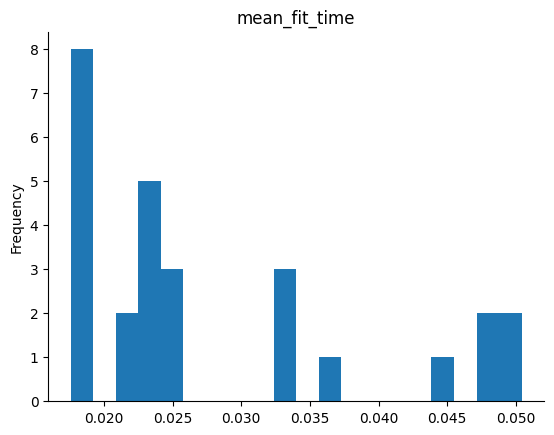

In [ ]:
# @title mean_fit_time

from matplotlib import pyplot as plt
search_results['mean_fit_time'].plot(kind='hist', bins=20, title='mean_fit_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
Y_train=train_data["FraudFound"]
X_train=train_data.drop(columns=["FraudFound"])

Y_val=val_data["FraudFound"]
X_val=val_data.drop(columns=["FraudFound"])

Y_test=test_data["FraudFound"]
X_test=test_data.drop(columns=["FraudFound"])

In [ ]:
# Definir el modelo con ponderación de pesos
best_model_weighted = DecisionTreeClassifier(**search.best_params_, class_weight='balanced'
    #criterion='gini'
    #random_state=42
)

# Entrenar el modelo ponderado con los datos de entrenamiento
best_model_weighted.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_prob = best_model.predict_proba(X_train)[:, 1]
y_train_pred_weighted = best_model_weighted.predict(X_train)
weighted_accuracy = accuracy_score(Y_train, y_train_pred_weighted)
print(f"Accuracy en el conjunto de validación para Decision Tree 1: {weighted_accuracy:.2f}")
print("Informe de clasificación para Decision Tree 1:")
print(classification_report(Y_train, y_train_pred_weighted))

Accuracy en el conjunto de validación para Decision Tree 1: 0.80
Informe de clasificación para Decision Tree 1:
              precision    recall  f1-score   support

           0       0.99      0.72      0.84      6461
           1       0.59      0.97      0.73      2584

    accuracy                           0.80      9045
   macro avg       0.79      0.85      0.78      9045
weighted avg       0.87      0.80      0.81      9045



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(train_data["FraudFound"], y_pred_train))

Confusion Matrix:
 [[5915  546]
 [ 800 1784]]


In [ ]:
# Valores de la matriz de confusión
TP = 1784  # Fraudes detectados correctamente
FP = 546   # No fraudes detectados como fraudes
TN = 5915  # No fraudes detectados correctamente
FN = 800   # Fraudes no detectados

# Definir los costos y beneficios (en dólares)
cost_FP = 300      # Costo por investigación innecesaria
cost_FN = 5000    # Pérdida por fraude no detectado
benefit_TP = 5000  # Ahorro por detectar un fraude

# Calcular los costos y beneficios
total_cost_FP = FP * cost_FP
total_cost_FN = FN * cost_FN
total_benefit_TP = TP * benefit_TP

# Calcular el impacto económico total
total_impact = total_benefit_TP - (total_cost_FP + total_cost_FN)

# Mostrar los resultados
print(f"Total costo por falsos positivos (FP): ${total_cost_FP}")
print(f"Total costo por falsos negativos (FN): ${total_cost_FN}")
print(f"Total ahorro por verdaderos positivos (TP): ${total_benefit_TP}")
print(f"Impacto económico neto: ${total_impact}")


Total costo por falsos positivos (FP): $163800
Total costo por falsos negativos (FN): $4000000
Total ahorro por verdaderos positivos (TP): $8920000
Impacto económico neto: $4756200


In [ ]:
y_pred = best_model.predict(val_data.drop(columns=["FraudFound"]))
y_pred_prob = best_model.predict_proba(val_data.drop(columns=["FraudFound"]))[:, 1]
y_val_pred_weighted = best_model_weighted.predict(X_val)
weighted_accuracy = accuracy_score(Y_val, y_val_pred_weighted)
print(f"Accuracy en el conjunto de validación para Decision Tree 1: {weighted_accuracy:.2f}")
print("Informe de clasificación para Decision Tree 1:")
print(classification_report(Y_val, y_val_pred_weighted))

Accuracy en el conjunto de validación para Decision Tree 1: 0.76
Informe de clasificación para Decision Tree 1:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1384
           1       0.55      0.91      0.69       554

    accuracy                           0.76      1938
   macro avg       0.75      0.81      0.75      1938
weighted avg       0.84      0.76      0.78      1938



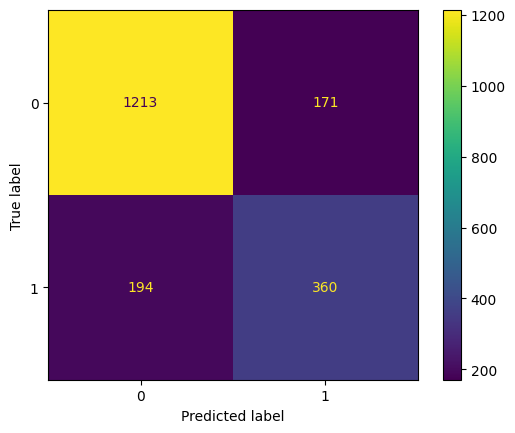

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=val_data["FraudFound"], y_pred=y_pred)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(val_data["FraudFound"], y_pred))

Confusion Matrix:
 [[1213  171]
 [ 194  360]]


In [ ]:
# Valores de la matriz de confusión
TP = 360  # Fraudes detectados correctamente
FP = 171   # No fraudes detectados como fraudes
TN = 1213  # No fraudes detectados correctamente
FN = 194   # Fraudes no detectados

# Definir los costos y beneficios (en dólares)
cost_FP = 300      # Costo por investigación innecesaria
cost_FN = 5000    # Pérdida por fraude no detectado
benefit_TP = 5000  # Ahorro por detectar un fraude

# Calcular los costos y beneficios
total_cost_FP = FP * cost_FP
total_cost_FN = FN * cost_FN
total_benefit_TP = TP * benefit_TP

# Calcular el impacto económico total
total_impact = total_benefit_TP - (total_cost_FP + total_cost_FN)

# Mostrar los resultados
print(f"Total costo por falsos positivos (FP): ${total_cost_FP}")
print(f"Total costo por falsos negativos (FN): ${total_cost_FN}")
print(f"Total ahorro por verdaderos positivos (TP): ${total_benefit_TP}")
print(f"Impacto económico neto: ${total_impact}")


Total costo por falsos positivos (FP): $51300
Total costo por falsos negativos (FN): $970000
Total ahorro por verdaderos positivos (TP): $1800000
Impacto económico neto: $778700


##SHAPS


In [ ]:

!pip install shap # install the shap module
import shap

In [ ]:
import matplotlib.pyplot as plt
import shap

In [ ]:
best_model_weighted.feature_importances_

array([0.04151929, 0.02385608, 0.01545915, 0.01717422, 0.00261032,
       0.01314735, 0.02430472, 0.01787068, 0.0063363 , 0.00370357,
       0.05076391, 0.23263803, 0.01224826, 0.        , 0.00497616,
       0.03574014, 0.00300513, 0.01288332, 0.        , 0.00282552,
       0.0103937 , 0.01768685, 0.00219762, 0.00382065, 0.        ,
       0.00387847, 0.02125498, 0.11281941, 0.00749706, 0.02503799,
       0.26690665, 0.00744447])

In [ ]:
importances = pd.Series(data=best_model_weighted.feature_importances_, index=X_train.columns)
importances

,0
Month,0.041519
WeekOfMonth,0.023856
DayOfWeek,0.015459
Make,0.017174
AccidentArea,0.002610
DayOfWeekClaimed,0.013147
MonthClaimed,0.024305
WeekOfMonthClaimed,0.017871
Sex,0.006336
MaritalStatus,0.003704


<Axes: >

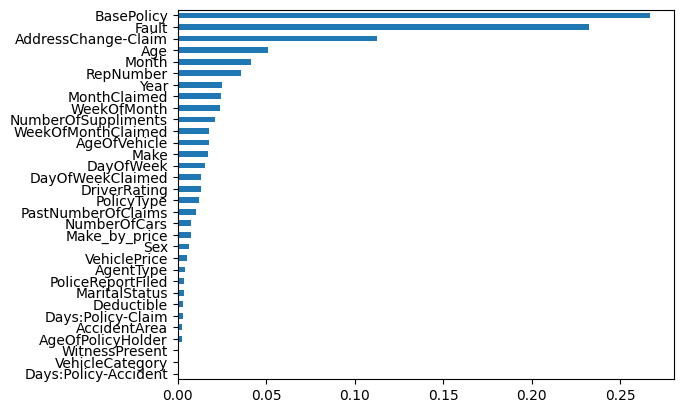

In [ ]:
importances.sort_values().plot.barh()

In [ ]:
explainer = shap.TreeExplainer(best_model_weighted)
explanation = explainer(X_train)
explanation.values.shape

(9045, 32, 2)

In [ ]:
X_train.shape

(9045, 32)

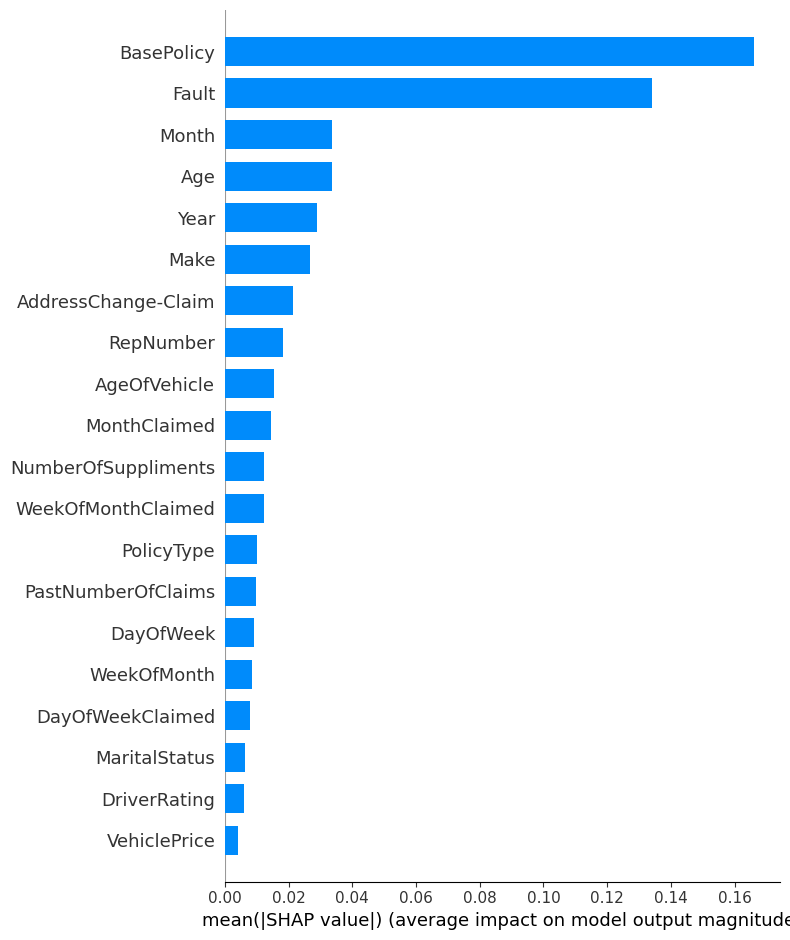

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=X_train, plot_type="bar")

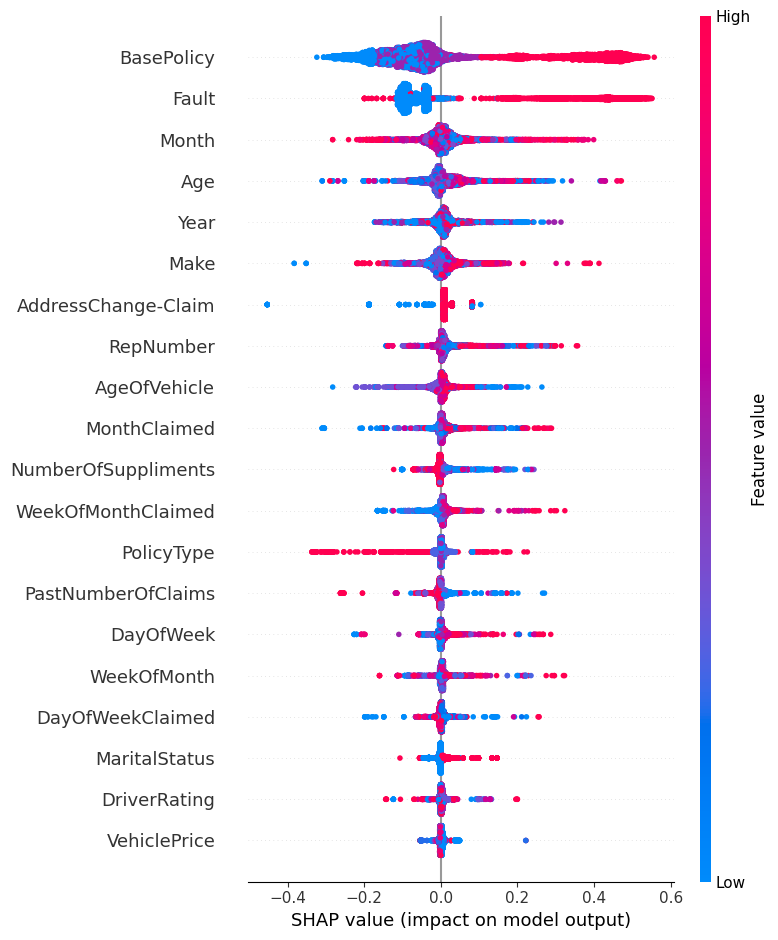

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,0], features=X_train)

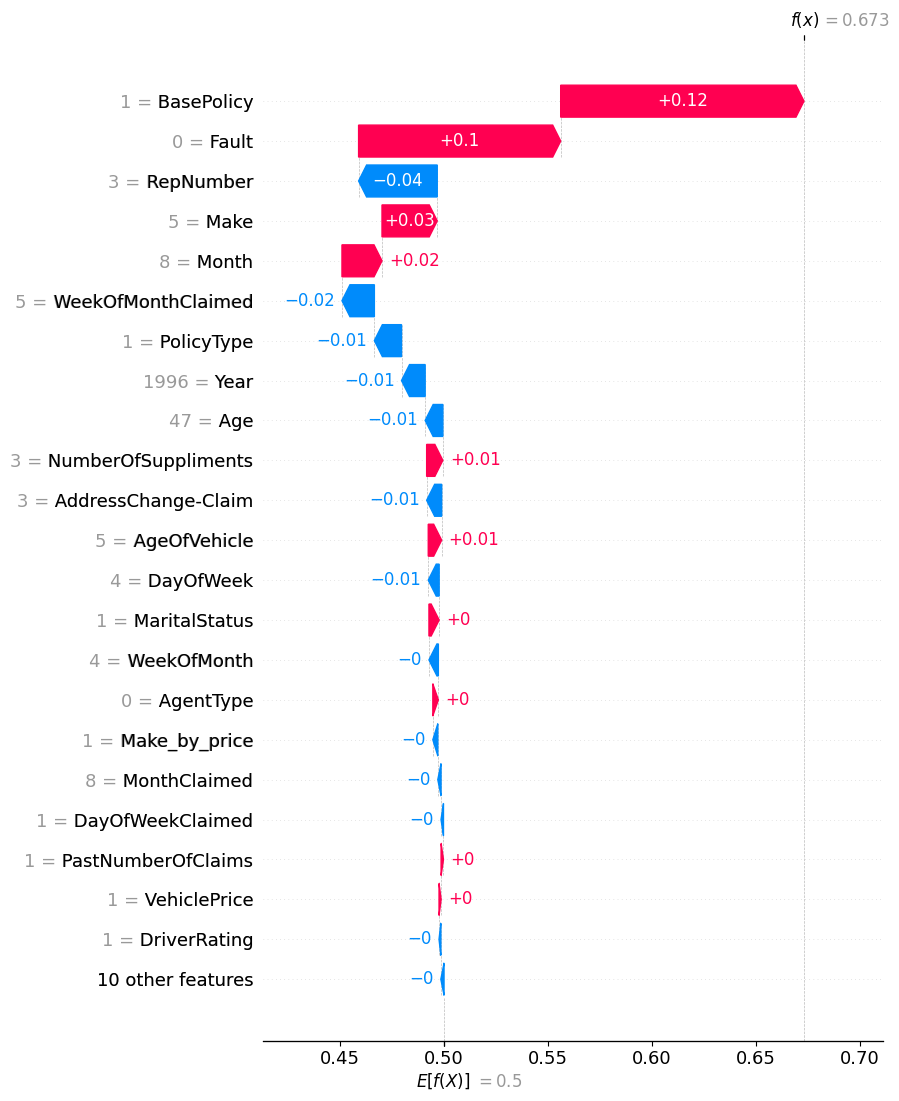

In [ ]:
shap.plots.waterfall(explanation[8,:,1], max_display=23)

# **Modelado Adicional**
  

In [ ]:
features = [
    'BasePolicy', 'Fault', 'AddressChange-Claim',
    'Month', 'Age', 'RepNumber', 'Days:Policy-Claim',
    'DriverRating', 'NumberOfSuppliments', 'Make'
]
X = train_data[features]
y = train_data["FraudFound"]

In [ ]:
# 2. División del Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 3. Entrenamiento de Modelos Alternativos
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# 4. Evaluación de Modelos
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1312
           1       0.89      0.92      0.90       497

    accuracy                           0.95      1809
   macro avg       0.93      0.94      0.93      1809
weighted avg       0.95      0.95      0.95      1809

[[1254   58]
 [  40  457]]


In [ ]:
# 5. Ajuste de Hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [ ]:
# Mejor modelo
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
Y_train.head(6)

,FraudFound
9715,1
4692,0
8066,0
5297,0
2900,0
9206,0


In [ ]:
train_data['Target']= y_pred_train
train_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Make_by_price,Target
9715,10,4,1,7,1,5,10,4,0,1,...,0,0,2,3,0,1995,1,1,1,0
4692,7,1,0,15,1,1,7,2,1,2,...,0,0,0,1,0,1994,1,0,1,0
8066,3,2,3,15,1,5,9,5,0,1,...,0,0,3,3,0,1995,0,0,1,0
5297,8,3,6,7,1,4,8,3,0,2,...,0,0,2,3,0,1994,2,0,1,0
2900,11,2,3,11,1,1,11,4,1,2,...,0,0,0,3,0,1994,2,0,1,0


In [ ]:
# Reseteamos el índice de train_data antes de aplicar el filtro
train_data_reset = train_data.reset_index(drop=True)

# Aplicamos el filtro al DataFrame con el índice reseteado
filtered_data = train_data_reset[(train_data_reset['FraudFound'] == 1) & (train_data_reset['Target'] != train_data_reset['FraudFound'])]

# Visualizar las filas filtradas
filtered_data.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Make_by_price,Target
0,10,4,1,7,1,5,10,4,0,1,...,0,0,2,3,0,1995,1,1,1,0
8,8,4,4,5,1,1,8,5,1,1,...,0,0,3,3,0,1996,1,1,1,0
13,7,5,6,11,1,5,6,2,1,2,...,0,0,3,3,0,1995,0,1,1,0
29,3,1,3,7,1,1,3,1,1,1,...,0,0,0,3,0,1995,1,1,1,0
55,5,3,0,2,1,1,5,3,1,1,...,0,0,1,3,0,1996,1,1,1,0
